In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-dataset/Employee.csv


In [2]:
df=pd.read_csv('/kaggle/input/employee-dataset/Employee.csv')

In [3]:
df.shape

(4653, 9)

In [4]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
df.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
df.describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


In [8]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

<Axes: >

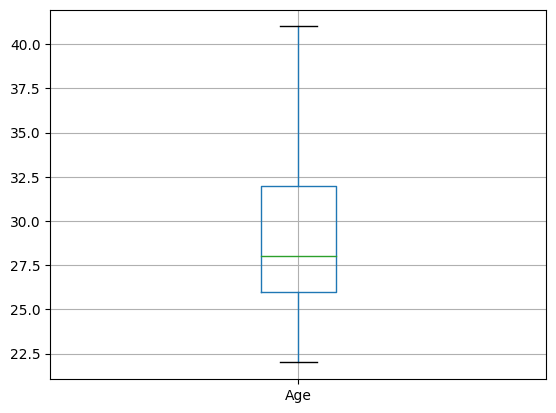

In [9]:
df[['Age']].boxplot()

The employee whose ages lies between min 21 to max 40

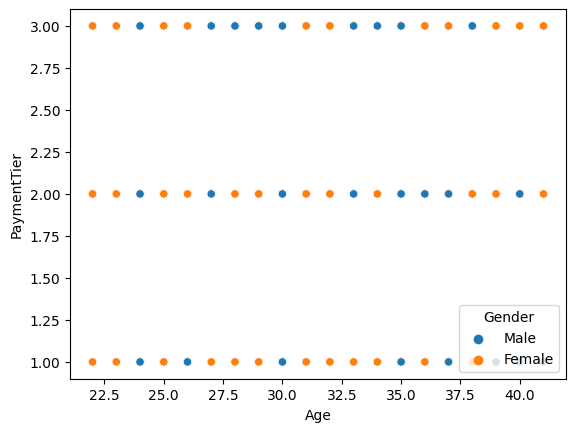

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='Age',y='PaymentTier',data=df,hue='Gender')
plt.show()

**Highest Paymenttier '3' received by the female employee whose age > 40.**

In [12]:
print(df['EverBenched'].value_counts())
print(df['Gender'].value_counts())
print(df['Education'].value_counts())
print(df['JoiningYear'].value_counts())
print(df['City'].value_counts())
print(df['LeaveOrNot'].value_counts())

EverBenched
No     4175
Yes     478
Name: count, dtype: int64
Gender
Male      2778
Female    1875
Name: count, dtype: int64
Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64
JoiningYear
2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: count, dtype: int64
City
Bangalore    2228
Pune         1268
New Delhi    1157
Name: count, dtype: int64
LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64


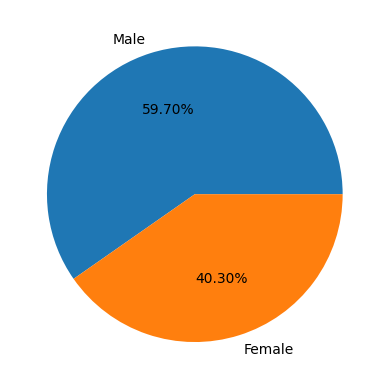

In [13]:
import matplotlib.pyplot as plt
y=['2778','1875']
Gender=['Male','Female']
plt.pie(y,labels=Gender,autopct='%1.2f%%')
plt.show()

# Male Employees-59.70%,Female Employees-40.30%

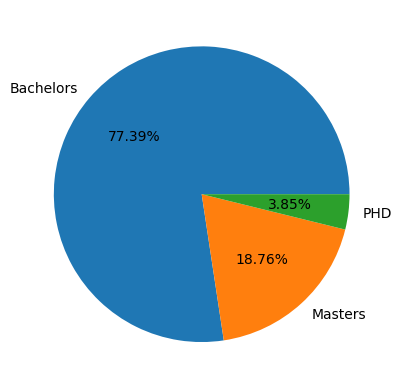

In [14]:
y=['3601','873','179']
Education=['Bachelors','Masters','PHD']
plt.pie(y,labels=Education,autopct='%1.2f%%')
plt.show()

**#Educational Qualification of Employees :Bachelors-77.39%,Masters-18.76%,PHD-3.85%**

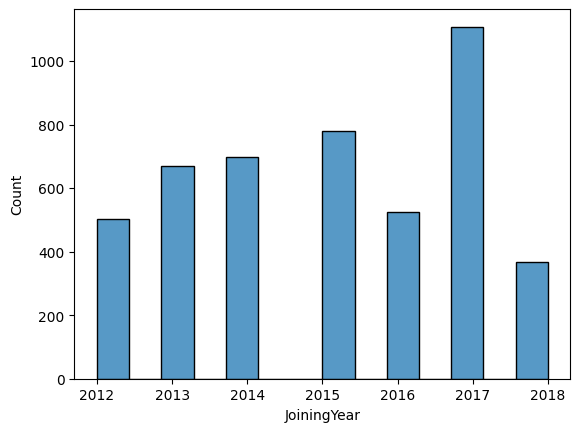

In [15]:
ax=sns.histplot(df['JoiningYear'])



# **From 2012 to 2018 :The no.of.employees joined most in the year 2017**

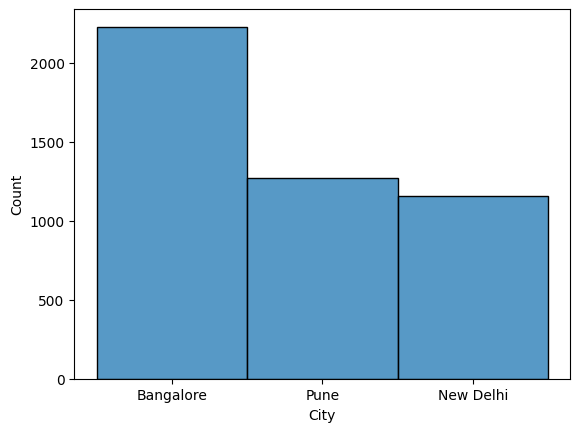

In [16]:
ax=sns.histplot(df['City'])

#BANGLORE IS THE CITY HAVING MAX NO.OF.EMPLOYEES

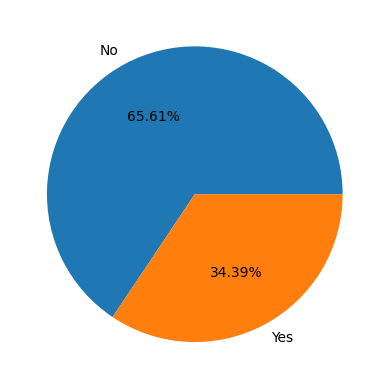

In [17]:
y=['3053','1600']
LeaveOrNot=['No','Yes']
plt.pie(y,labels=LeaveOrNot,autopct='%1.2f%%')
plt.show()

Employee Leave % is 34.39.

# **CONCLUSION:
# From the above Employee data set using EDA we can come up with the following results:
# 1.Educational Qualification of Employees :Bachelors-77.39%,Masters-18.76%,PHD-3.85%
# 2.Bangalore is the city with highest no.of.employees
# 3.From the joining year 2012 to 2018 :The most employees joined in the year 2017
# 4.Male Employees -59.70% and Female Employees-40.30%
# 5.Employee age min 21 to max 40 .
# 6.Female Employee getting highest paymenttier of Grade'3'.**